<a href="https://colab.research.google.com/github/Pavel-Zinkevich/Fruits-and-Vegetables-Image-Recognition/blob/main/Fruits_and_Vegetables_Image_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
od.download("https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pavelzinkevich
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition


100%|██████████| 1.98G/1.98G [00:17<00:00, 121MB/s]


In [5]:
img = Image.open("/content/fruit-and-vegetable-image-recognition/test/apple/Image_1.jpg")
print("Размер изображения:", img.size)

Размер изображения: (2218, 2216)


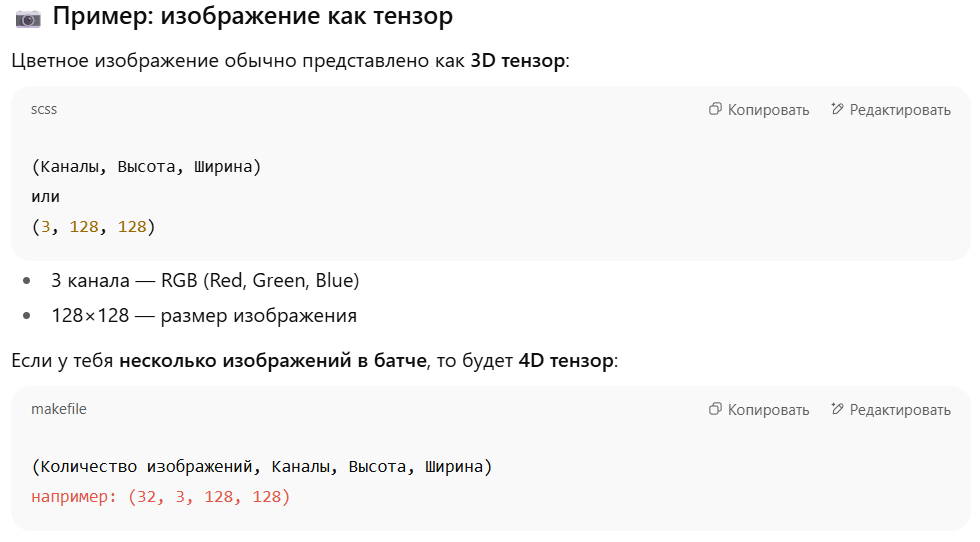

In [8]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # изменить размер изображения
    transforms.ToTensor(),           # превратить в тензор
])
train_dataset = datasets.ImageFolder(root='/content/fruit-and-vegetable-image-recognition/train', transform=transform)

print(train_dataset.class_to_idx)  # покажет словарь с соответствием папка → индекс
print(len(train_dataset))          # общее число изображений

# Можно взять один элемент:
img, label = train_dataset[0]

{'apple': 0, 'banana': 1, 'beetroot': 2, 'bell pepper': 3, 'cabbage': 4, 'capsicum': 5, 'carrot': 6, 'cauliflower': 7, 'chilli pepper': 8, 'corn': 9, 'cucumber': 10, 'eggplant': 11, 'garlic': 12, 'ginger': 13, 'grapes': 14, 'jalepeno': 15, 'kiwi': 16, 'lemon': 17, 'lettuce': 18, 'mango': 19, 'onion': 20, 'orange': 21, 'paprika': 22, 'pear': 23, 'peas': 24, 'pineapple': 25, 'pomegranate': 26, 'potato': 27, 'raddish': 28, 'soy beans': 29, 'spinach': 30, 'sweetcorn': 31, 'sweetpotato': 32, 'tomato': 33, 'turnip': 34, 'watermelon': 35}
3115
0


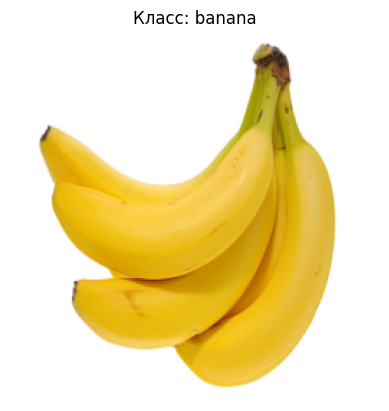

In [35]:
# Получаем картинку и метку
img_tensor, label_idx = train_dataset[100]

# Обратное преобразование из тензора в изображение (т.к. ToTensor() нормализует в [0,1])
img = img_tensor.permute(1, 2, 0).numpy()  # меняем оси с (C, H, W) на (H, W, C)

# Получаем имя класса по индексу
class_name = train_dataset.classes[label_idx]

# Показываем изображение с подписью
plt.imshow(img)
plt.title(f'Класс: {class_name}')
plt.axis('off')
plt.show()

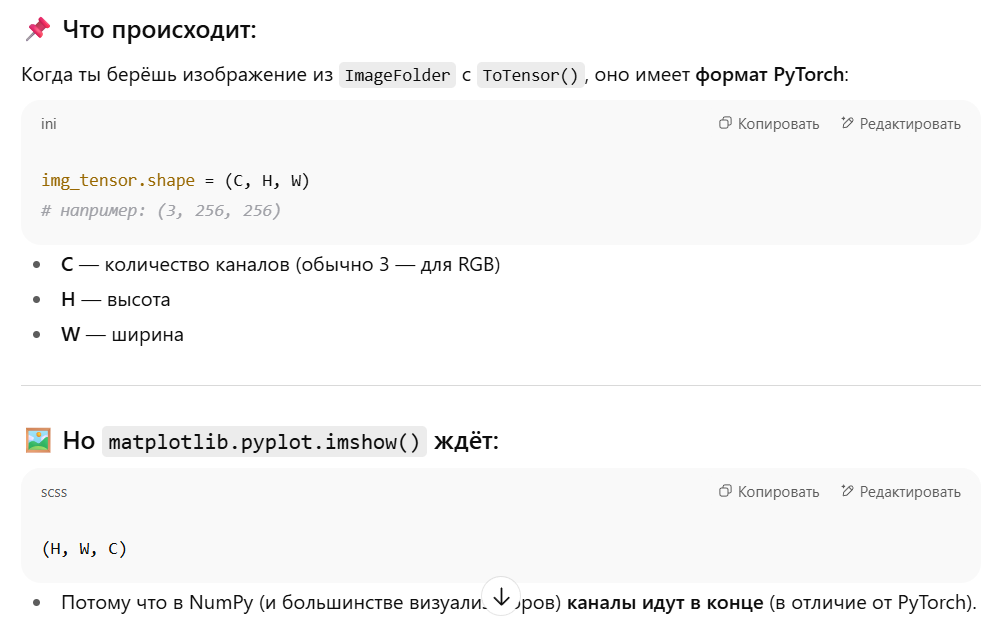

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/fruit-and-vegetable-image-recognition/train',
    target_size=(256, 256),
    batch_size=16,
    class_mode='categorical',
)

val_generator = train_datagen.flow_from_directory(
    '/content/fruit-and-vegetable-image-recognition/validation',
    target_size=(256, 256),
    batch_size=16,
    class_mode='categorical',
)


Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 40/195 ━━━━━━━━━━━━━━━━━━━━ 1:00 393ms/step - accuracy: 0.0549 - loss: 9.8992 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 483ms/step - accuracy: 0.0570 - loss: 5.5398 - val_accuracy: 0.2165 - val_loss: 2.8695
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 85s 435ms/step - accuracy: 0.1810 - loss: 2.9739 - val_accuracy: 0.6268 - val_loss: 2.0202
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 433ms/step - accuracy: 0.4457 - loss: 2.0421 - val_accuracy: 0.8746 - val_loss: 0.8608
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 96s 491ms/step - accuracy: 0.7788 - loss: 0.9251 - val_accuracy: 0.9544 - val_loss: 0.4344
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 95s 489ms/step - accuracy: 0.9260 - loss: 0.3471 - val_accuracy: 0.9573 - val_loss: 0.3555
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 85s 435ms/step - accuracy: 0.9462 - loss: 0.2626 - val_accuracy: 0.9573 - val_loss: 0.2610
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 85s 435ms/step - accuracy: 0.9545 - loss: 0.2221 - val_accuracy: 0.9601 - val_loss: 0.3220
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 86s 442ms/step - accuracy: 0.9631 - loss: 0.1608 - va

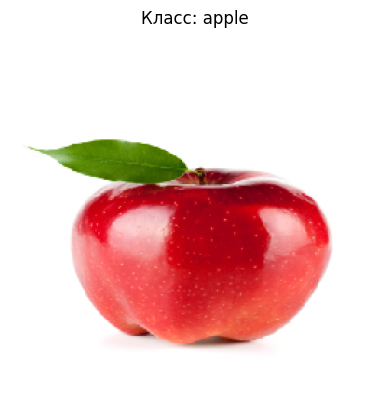

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Берём первый батч (16 картинок)
images, labels = next(train_generator)

# Выводим первую картинку и её метку
image = images[0]
label_vector = labels[0]

# Преобразуем one-hot метку в индекс класса
label_index = np.argmax(label_vector)

# Получаем название класса
class_name = train_generator.class_indices  # словарь {class_name: index}
class_name = list(class_name.keys())[label_index]

# Отображаем изображение
plt.imshow(image)
plt.title(f"Класс: {class_name}")
plt.axis('off')
plt.show()


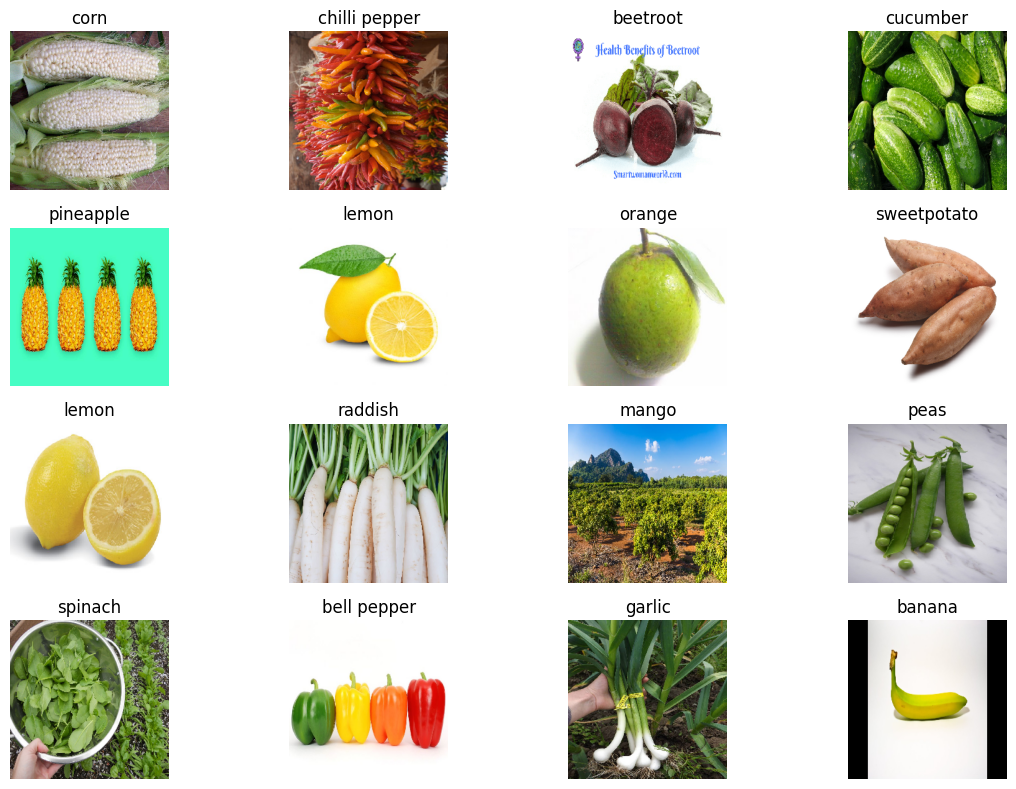

In [12]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(train_generator)

batch_size = images.shape[0]
cols = 4
rows = batch_size // cols if batch_size % cols == 0 else batch_size // cols + 1

plt.figure(figsize=(12, 8))
for i in range(batch_size):
    plt.subplot(rows, cols, i+1)
    plt.imshow(images[i])

    label_index = np.argmax(labels[i])
    class_name = list(train_generator.class_indices.keys())[label_index]

    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()
